In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click /off the raw code."></form>''')

## <span style="color:orange;font-size:1.4em;"><b> DATA PREPROCESSING</b> </span> 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### <span style="color:Red;font-size:1.4em;"><b>Importing Dataset</b></span> 

In [3]:
df_dementia=pd.read_csv('oasis_longitudinal.csv')
df_dementia.head()

,Subject ID,MRI ID,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,OAS2_0001,OAS2_0001_MR1,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,OAS2_0001,OAS2_0001_MR2,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
2,OAS2_0002,OAS2_0002_MR1,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,Demented
3,OAS2_0002,OAS2_0002_MR2,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,Demented
4,OAS2_0002,OAS2_0002_MR3,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,Demented


In [4]:
# dropping irrelevant columns
df_dementia=df_dementia.drop(['Subject ID','MRI ID','Hand'],axis=1)
df_dementia.head()

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
2,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,Demented
3,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,Demented
4,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,Demented


<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span><b> Subject ID and MRI ID and Hand is irrelevant for analysis so we drop it</b>

In [5]:
df_dementia1=df_dementia

In [6]:
df_dementia.shape

(373, 12)

<b>There are 373 rows and 12 columns in our dataset</b>

In [7]:
df_dementia.dtypes

Visit         int64
MR Delay      int64
M/F          object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
Group        object
dtype: object

<b>There are 10 numeric columns and 2 categorical columns</b>

In [8]:
df_dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<b>1.The average age of patients is 77years</b><br>
<b>2.The average education level is 15years</b><br>
<b>3.The average SES is 2.46 which falls under low SES</b><br>
<b>4.The avg Clinical dementia rating is 0.3 </b>

In [9]:
df_dementia.describe(include='object')

,M/F,Group
count,373,373
unique,2,3
top,F,Nondemented
freq,213,190


In [10]:
df_dementia.isnull().sum()

Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
Group        0
dtype: int64

<span style="color:purple;font-size:1.4em;"><b>Inference : </b></span> 
<b>SES and MMSE has null values,so we replace it with mean,median or mode</b>

In [11]:
df_dementia.SES.describe()

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [12]:
df_dementia.SES.mode()

0    2.0
dtype: float64

In [13]:
df_dementia.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>SES has only integer values so we have to replace it with median or mode</b>

In [14]:
df_dementia.SES.mean()

2.4604519774011298

In [15]:
df_dementia.SES.median()

2.0

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b> Mean,median and mode is close to 2 so we replace null values of SES by 2</b>

In [16]:
df_dementia.MMSE.mode()

0    30.0
dtype: float64

In [17]:
df_dementia.MMSE.unique()

array([27., 30., 23., 28., 22., 29., 24., 21., 16., 25., 26., 15., 20.,
       19.,  7.,  4., 17., 18., nan])

In [18]:
df_dementia.MMSE.describe()

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [19]:
df_dementia["SES"].fillna(df_dementia["SES"].median(), inplace=True)
df_dementia["MMSE"].fillna(df_dementia["MMSE"].median(), inplace=True)

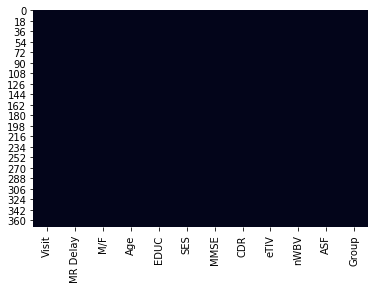

In [20]:
sns.heatmap(data=df_dementia.isnull(),cbar=False)

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>Now there are no missing values so we can move forward</b>

<b> Checking for outliers</b>

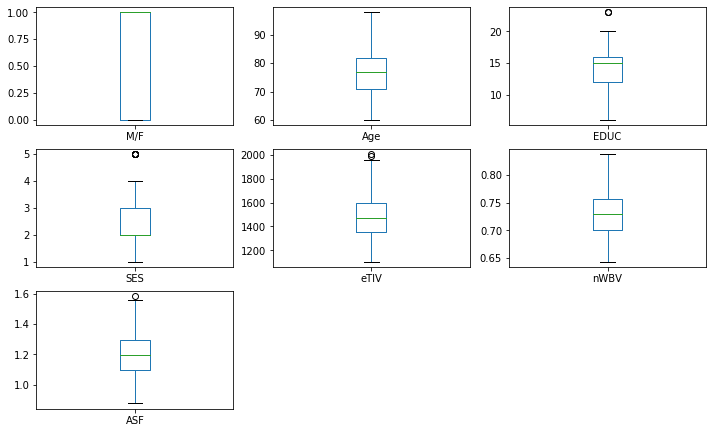

In [37]:

df_dementia.plot(kind='box',figsize=(12,10),subplots=True,layout=(4,3))
plt.show()

<span style="color:purple;font-size:1.4em;"><b>Inference :</b> </span> 
<b>The outliers are insignificant and thus we can proceed</b>

In [22]:
df_dementia.drop(["Visit","MR Delay"],axis=1,inplace=True)

In [23]:
df_dementia["Group"].replace({"Nondemented":0,"Demented":1},inplace=True)

In [24]:
df_dementia["M/F"].replace({"M":0,"F":1},inplace=True)

In [25]:
df_dementia.head(5)

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,0,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,0,80,12,2.0,22.0,0.5,1698,0.701,1.034,1



### <span style="color:Red;font-size:1.4em;"><b>After Encoding Categorical variables</b></span>

<b>Concatinating numeric and categorical variables</b>

In [33]:
df.head(5)

,M/F,Age,EDUC,SES,eTIV,nWBV,ASF,Group,MMSE,CDR
0,0,87,14,2.0,1987,0.696,0.883,0,14,0
1,0,88,14,2.0,2004,0.681,0.876,0,17,0
2,0,75,12,2.0,1678,0.736,1.046,1,10,1
3,0,76,12,2.0,1738,0.713,1.010,1,15,1
4,0,80,12,2.0,1698,0.701,1.034,1,9,1


In [34]:
df["Group"].replace({"Converted":1},inplace=True)